In [4]:
from flask import Flask

app = Flask(__name__)

@app.route("/<name>")
def home(name):
    return f"<h1>hello {name}</h1>"

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [25/Jun/2024 02:46:18] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [25/Jun/2024 02:46:21] "GET /rr HTTP/1.1" 200 -
127.0.0.1 - - [25/Jun/2024 02:46:31] "GET /tt HTTP/1.1" 200 -


安裝line-bot-sdk函式庫

In [2]:
!pip install line-bot-sdk

     ---------------------------------------- 0.0/109.4 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.4 kB ? eta -:--:--
     ---------- -------------------------- 30.7/109.4 kB 660.6 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/109.4 kB 751.6 kB/s eta 0:00:01
     ------------------------------------ 109.4/109.4 kB 793.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/758.4 kB ? eta -:--:--
   ------- -------------------------------- 133.1/758.4 kB 4.0 MB/s eta 0:00:01
   --------- ------------------------------ 184.3/758.4 kB 2.2 MB/s eta 0:00:01
   --------------------- ------------------ 399.4/758.4 kB 3.1 MB/s eta 0:00:01
   ----------------------- ---------------- 440.3/758.4 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 758.4/758.4 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/370.8 kB ? eta -:--:--
   --------------------------------------  368.6/370.8 kB 11.6 MB/s eta

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.7.4 which is incompatible.


In [8]:
from flask import Flask, request

# 載入 json 標準函式庫，處理回傳的資料格式
import json

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage


class CFG:
    # 你的 LINE Channel access token
    Channel_access_token = "RBHXK6bnUll4n6JN60fg90MQYF6J975RxR+Lsdrn9RldjhdyJMTzjqdDU5jx4cIDBDpxZIZWwBeqv0jX/4fmsSYejcSNsL0ohRf4xlAmQCx0Eg031Cz9A43jXgWSkHSuWoTskkqLrOwWrFitwha7FQdB04t89/1O/w1cDnyilFU"
    # 你的 LINE Channel secret
    Channel_secret = "6a9c1ffca393b5d4fd873fc3651d9b6a"

app = Flask(__name__)

@app.route("/", methods=['POST'])
def linebot():
     # 取得收到的訊息內容
    body = request.get_data(as_text=True)
    try:
        # json 格式化訊息內容
        json_data = json.loads(body)
        access_token = CFG.Channel_access_token
        secret = CFG.Channel_secret
        # 確認 token 是否正確
        line_bot_api = LineBotApi(access_token)
        # 確認 secret 是否正確
        handler = WebhookHandler(secret)
        # 加入回傳的 headers
        signature = request.headers['X-Line-Signature']
        # 綁定訊息回傳的相關資訊
        handler.handle(body, signature)
        # 取得回傳訊息的 Token
        tk = json_data['events'][0]['replyToken']
        # 取得 LINe 收到的訊息類型
        type = json_data['events'][0]['message']['type']
        if type=='text':
            # 取得 LINE 收到的文字訊息
            msg = json_data['events'][0]['message']['text']
            # 印出內容
            print(msg)
            reply = msg
        else:
            reply = '你傳的不是文字呦～'
        print(reply)
        # 回傳訊息
        line_bot_api.reply_message(tk,TextSendMessage(reply))
    except:
        # 如果發生錯誤，印出收到的內容
        print(body)
    # 驗證 Webhook 使用，不能省略
    return 'OK'

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
C:\Users\33313\AppData\Local\Temp\ipykernel_804\399825296.py:31: LineBotSdkDeprecatedIn30: Call to deprecated class LineBotApi. (Use v3 class; linebot.v3.<feature>. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  line_bot_api = LineBotApi(access_token)
C:\Users\33313\AppData\Local\Temp\ipykernel_804\399825296.py:33: LineBotSdkDeprecatedIn30: Call to deprecated class WebhookHandler. (Use 'from linebot.v3.webhook import WebhookHandler' instead. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  handler = WebhookHandler(secret)
127.0.0.1 - - [25/Jun/2024 02:52:12] "POST / HTTP/1.1" 200 -


haha
{"destination":"U08e650068e375648db9be9c74cc0ae4a","events":[]}


127.0.0.1 - - [25/Jun/2024 02:53:30] "POST / HTTP/1.1" 200 -


haha
{"destination":"U08e650068e375648db9be9c74cc0ae4a","events":[]}
haha
hh
hh


C:\Users\33313\AppData\Local\Temp\ipykernel_804\399825296.py:52: LineBotSdkDeprecatedIn30: Call to deprecated method reply_message. (Use 'from linebot.v3.messaging import MessagingApi' and 'MessagingApi(...).reply_message(...)' instead. See https://github.com/line/line-bot-sdk-python/blob/master/README.rst for more details.) -- Deprecated since version 3.0.0.
  line_bot_api.reply_message(tk,TextSendMessage(reply))
127.0.0.1 - - [25/Jun/2024 02:53:40] "POST / HTTP/1.1" 200 -


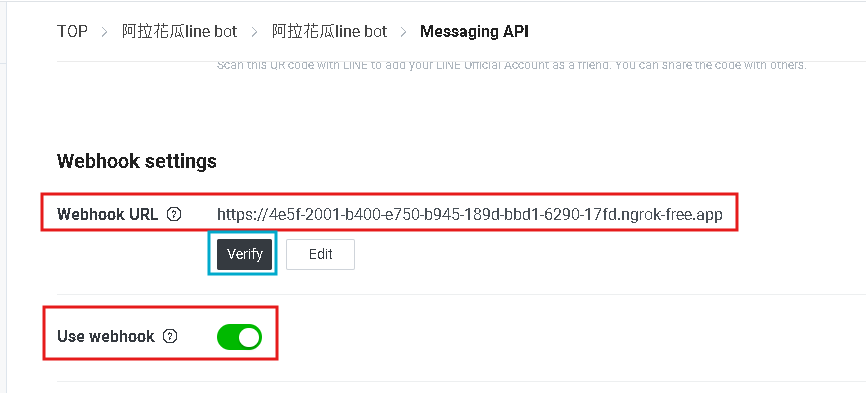
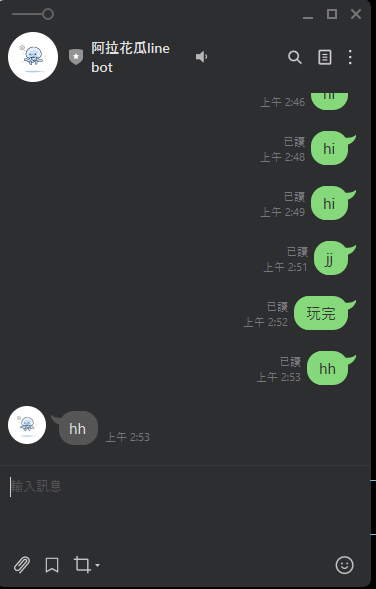